In [36]:
import numpy as np
import random

class Perceptron:
    def __init__(self, aprendizaje=0.001, epocas=1000):
        self.aprendizaje = aprendizaje
        self.epocas = epocas
        self.w = None
        self.b = None   
        self.errores = []

    def perceptron(self, x):
        return np.dot(x, self.w) + self.b

    def activacion(self, z): # Escalón unitario
        return 0 if z <= 0 else 1

    def error(self, y, y_pred):
        return ((y - y_pred)**2).mean()
    
    def ajustar(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        self.w = np.random.rand(X.shape[1])
        self.b = random.random()

        for _ in range(self.epocas):
            # Ajustamos los parámetros de todas las muestras en forma simultánea

            # Forward propagation - Propagación hacia adelante
            y_pred = np.array([self.predecir(x) for x in X])
            error  = y - y_pred

            # Backpropagation - Retropropagación 
            self.w += self.aprendizaje * np.dot(error, X)
            self.b += self.aprendizaje * error.sum()

            self.errores.append(self.error(y, y_pred))
        return self 

    def predecir(self, x):
        return self.activacion(self.perceptron(x))

class PerceptronLineal(Perceptron):
    def activacion(self, z):
        return z


In [32]:
import pandas as pd
def cargar():
    datos = pd.read_csv('iris.csv')
    X = datos[['SepalLength', 'SepalWidth', 'PetalLength','PetalWidth']].values
    tipos = datos['Name'].values
    y = np.array([1 if tipo == 'Iris-setosa' else 0 for tipo in tipos])
    return X, y 


In [38]:
X, y = cargar()

print("-----")
p = Perceptron()

p.ajustar(X, y)
print(p.w, p.b)

for n in [10, 40, 60, 90, 120]:
    print(f'Predicción: {p.predecir(X[n])}, Real: {y[n]}')

-----
[-0.1828828   0.37645597 -0.48748883  0.1774623 ] 0.7605475721003536
Predicción: 1, Real: 1
Predicción: 1, Real: 1
Predicción: 0, Real: 0
Predicción: 0, Real: 0
Predicción: 0, Real: 0


[21.42879796] 0.9126627119144822


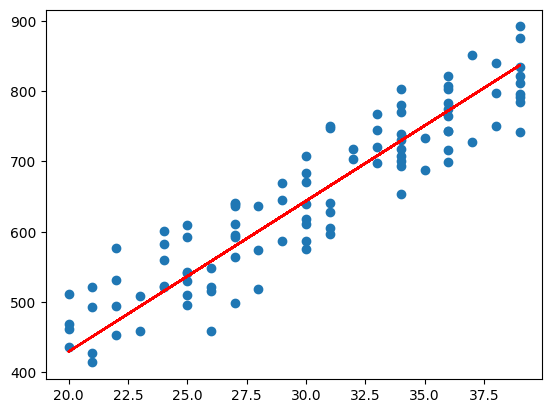

In [51]:
import matplotlib.pyplot as plt 
datos = pd.read_csv('helados.csv')
X = datos[['temperatura']].values
y = datos['ventas'].values
p = PerceptronLineal(0.00001, 10)
p.ajustar(X, y)
print(p.w, p.b)
plt.scatter(datos['temperatura'], datos['ventas'])
plt.plot(X, [p.predecir(x) for x in X], color='red')
# plt.plot(p.errores)